# Fundamentals of machine learning

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 2s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 10ms/step - loss: 0.6306 - accuracy: 0.8075 - val_loss: 0.2495 - val_accuracy: 0.9251
Epoch 2/2
375/375 [==============================] - 3s 9ms/step - loss: 0.2516 - accuracy: 0.9222 - val_loss: 0.2074 - val_accuracy: 0.9377
Epoch 1/2
375/375 [==============================] - 4s 9ms/step - loss: 0.2878 - accuracy: 0.9167 - val_loss: 0.1649 - val_accuracy: 0.9508
Epoch 2/2
375/375 [==============================] - 3s 9ms/step - loss: 0.1180 - accuracy: 0.9653 - val_loss: 0.1053 - val_accuracy: 0.9682


**Plotting a validation accuracy comparison**

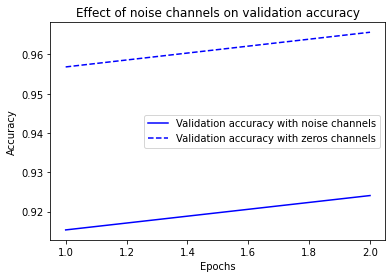

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 3)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 6s 14ms/step - loss: 2.3163 - accuracy: 0.1046 - val_loss: 2.3064 - val_accuracy: 0.1038
Epoch 2/2
375/375 [==============================] - 5s 14ms/step - loss: 2.2997 - accuracy: 0.1160 - val_loss: 2.3136 - val_accuracy: 0.1032


## Evaluating machine-learning models

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 6s 14ms/step - loss: 554.0236 - accuracy: 0.3506 - val_loss: 2.3170 - val_accuracy: 0.3060
Epoch 2/2
375/375 [==============================] - 5s 14ms/step - loss: 4.0898 - accuracy: 0.2550 - val_loss: 2.2634 - val_accuracy: 0.2087


**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 6s 14ms/step - loss: 0.3487 - accuracy: 0.9137 - val_loss: 0.1900 - val_accuracy: 0.9507
Epoch 2/2
375/375 [==============================] - 5s 13ms/step - loss: 0.1418 - accuracy: 0.9635 - val_loss: 0.1453 - val_accuracy: 0.9663


### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 4ms/step - loss: 0.6705 - accuracy: 0.8342 - val_loss: 0.3596 - val_accuracy: 0.9021
Epoch 2/2
375/375 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.9025 - val_loss: 0.3072 - val_accuracy: 0.9150


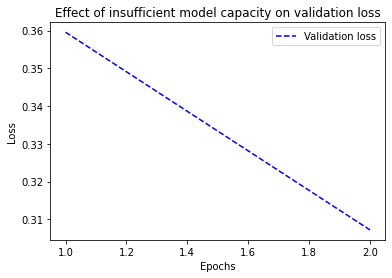

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 4s 9ms/step - loss: 0.3617 - accuracy: 0.8990 - val_loss: 0.1929 - val_accuracy: 0.9465
Epoch 2/2
375/375 [==============================] - 3s 8ms/step - loss: 0.1625 - accuracy: 0.9517 - val_loss: 0.1440 - val_accuracy: 0.9569


## Improving generalization

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 3s 68ms/step - loss: 0.5211 - accuracy: 0.7917 - val_loss: 0.4072 - val_accuracy: 0.8507
Epoch 2/2
30/30 [==============================] - 1s 47ms/step - loss: 0.3149 - accuracy: 0.8998 - val_loss: 0.3052 - val_accuracy: 0.8920


**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 3s 66ms/step - loss: 0.6626 - accuracy: 0.5981 - val_loss: 0.6299 - val_accuracy: 0.6479
Epoch 2/2
30/30 [==============================] - 1s 42ms/step - loss: 0.6028 - accuracy: 0.7136 - val_loss: 0.5793 - val_accuracy: 0.7046


**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 13s 425ms/step - loss: 0.5485 - accuracy: 0.7685 - val_loss: 0.4666 - val_accuracy: 0.7851
Epoch 2/2
30/30 [==============================] - 9s 308ms/step - loss: 0.2618 - accuracy: 0.8979 - val_loss: 0.4910 - val_accuracy: 0.8130


#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 3s 68ms/step - loss: 0.5806 - accuracy: 0.7892 - val_loss: 0.4696 - val_accuracy: 0.8473
Epoch 2/2
30/30 [==============================] - 2s 59ms/step - loss: 0.3899 - accuracy: 0.8966 - val_loss: 0.3876 - val_accuracy: 0.8831


**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 3s 66ms/step - loss: 0.6312 - accuracy: 0.6348 - val_loss: 0.5133 - val_accuracy: 0.8532
Epoch 2/2
30/30 [==============================] - 1s 49ms/step - loss: 0.5044 - accuracy: 0.7802 - val_loss: 0.3974 - val_accuracy: 0.8702


## Summary

在noise channel跟zero channel不同的準確率